## Dataset público básico obtenido de IMDb 

In [81]:
import pandas as pd 
import itertools
import json


In [2]:
df = pd.read_csv("data.tsv", delimiter='\t')

In [3]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7316917,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7316918,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7316919,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7316920,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


### Al comprobar los faltantes, se ve que hay 9 faltantes en primaryTitle, 9 en originalTitle y 9 en genres

In [3]:
df.isnull().sum(axis=0)

tconst            0
titleType         0
primaryTitle      9
originalTitle     9
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            9
dtype: int64

In [4]:
print(df.columns)

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


In [5]:
df.shape

(7316922, 9)

In [6]:
#Primero comprobamos los diferentes tipos de películas que aparecen
df["titleType"].unique()
 

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [7]:
#Elimino todo aquello que no esté categorizado como "movie" y comprobamos el nuevo tamaño del dataframe
df = df.drop(df[df["titleType"]!= "movie"].index)
df.shape

(558057, 9)

In [8]:
#Comprobamos los tipos de datos que tenemos en el dataframe
df.dtypes


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [9]:
#En startYear aparecen valores nulos como N, así que eliminamos esas filas para las películas que no están fechadas
df[df["startYear"] == "\\N"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
70393,tt0071844,movie,Till Marriage Do Us Part,"Mio Dio, come sono caduta in basso!",0,\N,\N,110,Comedy
109178,tt0111597,movie,The Veiled Hope,The Veiled Hope,0,\N,\N,52,Documentary
115876,tt0118530,movie,18,18,0,\N,\N,\N,Romance
118070,tt0120892,movie,Winding Stair,Winding Stair,0,\N,\N,\N,Thriller
118208,tt0121062,movie,Alexandru Lapusneanu,Alexandru Lapusneanu,0,\N,\N,\N,History
...,...,...,...,...,...,...,...,...,...
7316596,tt9916178,movie,Yesterday's Dreams,Yesterday's Dreams,0,\N,\N,\N,\N
7316600,tt9916188,movie,Minotaur,Minotaur,0,\N,\N,\N,Thriller
7316601,tt9916190,movie,Safeguard,Safeguard,0,\N,\N,90,"Action,Adventure,Thriller"
7316640,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,\N,\N,84,Thriller


In [10]:
df = df.drop(df[df["startYear"]== "\\N"].index)
#Dropeamos las celdas donde el año es nulo


In [11]:
df.shape

(491349, 9)

In [12]:
#Convertimos el año a un entero
df.startYear = df.startYear.astype(int)


In [13]:
 #No nos interesan ni el año de finalización dela emisión (ya que las películas no tienen), ni el tipo de título (todos son "movies"). Así que eliminamos esas columnas. Además, eliminamos las celdas donde runtime es nulo, ya que nos interesa saber si las películas mejor puntuadas tendrán una duración en un rango determinado (ni muy largas ni muy cortas). 
 
 df = df.drop(columns=["endYear", "titleType"])
 df.shape
 sum(df["runtimeMinutes"] != "\\N")
 df = df.drop(df[df["runtimeMinutes"]== "\\N"].index)
 print(df.shape)
 print(df.head())

(346660, 7)
         tconst                    primaryTitle  \
8     tt0000009                      Miss Jerry   
498   tt0000502                        Bohemios   
570   tt0000574     The Story of the Kelly Gang   
672   tt0000679  The Fairylogue and Radio-Plays   
1172  tt0001184         Don Juan de Serrallonga   

                       originalTitle  isAdult  startYear runtimeMinutes  \
8                         Miss Jerry        0       1894             45   
498                         Bohemios        0       1905            100   
570      The Story of the Kelly Gang        0       1906             70   
672   The Fairylogue and Radio-Plays        0       1908            120   
1172         Don Juan de Serrallonga        0       1910             58   

                     genres  
8                   Romance  
498                      \N  
570   Biography,Crime,Drama  
672       Adventure,Fantasy  
1172        Adventure,Drama  


In [14]:
#Como el género de la película es una de las cosas que más nos conviene tener controlada, dropeamos las celdas que tiene el género como nulo
df = df.drop(df[df["genres"]== "\\N"].index)
print(df.shape)
df.head()


(323669, 7)


,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,45,Romance
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama"
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
1172,tt0001184,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
1246,tt0001258,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama


In [15]:
df["genres"].unique()
#print(df["genres"].nunique())

# Hay 1348 géneros distintos


array(['Romance', 'Biography,Crime,Drama', 'Adventure,Fantasy', ...,
       'History,Reality-TV,War', 'Mystery,Reality-TV,Thriller',
       'Music,Musical,Reality-TV'], dtype=object)

In [16]:
#Como podemos observar en algunas películas, el género en algunas ocasiones es una lista compuesta por varios géneros. Por ejemplo:

df.loc[570].genres

'Biography,Crime,Drama'

In [17]:
#Esto lo resolvemos de la siguiente forma:
df["genres"] = df["genres"].str.split(",")
set(itertools.chain.from_iterable(df["genres"]))
all_genres = set(itertools.chain.from_iterable(df["genres"]))

In [18]:
all_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [19]:
for genre in all_genres:
    df[genre] = df.genres.apply(lambda x : True if genre in x else False)

In [20]:
# Con esto conseguimos ver si cada película contiene cada uno de los géneros. 
df

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Comedy,Music,Musical,Family,Adult,Crime,Mystery,War,Film-Noir,Sci-Fi
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,45,[Romance],False,False,True,...,False,False,False,False,False,False,False,False,False,False
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"[Biography, Crime, Drama]",False,False,False,...,False,False,False,False,False,True,False,False,False,False
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"[Adventure, Fantasy]",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1172,tt0001184,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"[Adventure, Drama]",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1246,tt0001258,The White Slave Trade,Den hvide slavehandel,0,1910,45,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316685,tt9916362,Coven,Akelarre,0,2020,90,"[Drama, History, Horror]",False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316770,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316811,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,[Documentary],False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316838,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,[Documentary],False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Las películas más populares como podemos observar, son los dramas, seguidos de documentales y comedias
df[all_genres].sum(axis=0).sort_values(ascending = False)

Drama          137907
Documentary     75361
Comedy          72454
Romance         31402
Action          29729
Crime           24793
Thriller        22760
Horror          19041
Adventure       18478
Family          11919
Biography       11631
Mystery         11014
History          9924
Music            8620
Fantasy          8566
Musical          6884
Sci-Fi           6732
War              6527
Adult            5337
Western          5149
Animation        4993
Sport            4382
News             1338
Film-Noir         786
Reality-TV        150
Talk-Show          44
Short              39
Game-Show           4
dtype: int64

In [22]:
# El primer género que aparece lo consideramos como el género principal:
df.genres.apply(lambda x: x[0]).value_counts()

Drama          88907
Documentary    64551
Comedy         62631
Action         29729
Crime          13798
Adventure      12051
Horror         10740
Biography      10689
Adult           5300
Thriller        4500
Romance         3113
Animation       2979
Western         2600
Family          2394
Mystery         1853
Fantasy         1752
Musical         1472
Sci-Fi          1230
Music           1119
Sport            805
History          702
War              565
Reality-TV       100
Film-Noir         32
Talk-Show         30
News              20
Game-Show          4
Short              3
Name: genres, dtype: int64

In [23]:
# Vemos que aunque lo primero que hicimos fue quitar el tipo short, vuelven a aparecer dentro del género de la película. Así que quitamos las que tengan valor True en el género Short:

df = df.drop(df[df["Short"]].index)

In [24]:
# Ya solo tenemos los largometrajes y categorizados por género


In [25]:
df[df["Adult"]]

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Comedy,Music,Musical,Family,Adult,Crime,Mystery,War,Film-Noir,Sci-Fi
61952,tt0063176,Karla,Karla,1,1969,80,"[Adult, Drama]",False,False,False,...,False,False,False,False,True,False,False,False,False,False
64113,tt0065397,The Adult Workshop of Love,Anatomie des Liebesaktes,1,1970,90,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
64157,tt0065442,Bacchanale,Bacchanale,1,1970,70,"[Adult, Fantasy, Horror]",False,False,False,...,False,False,False,False,True,False,False,False,False,False
64571,tt0065869,Why Do They Do It?,Hvorfor gør de det?,1,1971,90,"[Adult, Documentary]",False,False,False,...,False,False,False,False,True,False,False,False,False,False
64605,tt0065904,The Party at Kitty and Stud's,The Party at Kitty and Stud's,1,1970,71,"[Adult, Comedy, Drama]",False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220276,tt9713908,Costa Dogging,Costa Dogging,1,2018,94,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
7230604,tt9735434,Dogging in the sun,Dogging in the sun,1,2018,87,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
7245023,tt9765780,Hemmafruarnas hemliga sexliv,Hemmafruarnas hemliga sexliv,1,1981,73,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
7266758,tt9811452,Chikati Gadilo Chithakotudu,Chikati Gadilo Chitakottudu,1,2019,152,"[Adult, Comedy]",False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [26]:
df[df["isAdult"] == 1] 


,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Comedy,Music,Musical,Family,Adult,Crime,Mystery,War,Film-Noir,Sci-Fi
59174,tt0060313,"Dingle, Dangle","Dingle, Dangle",1,1966,61,[Comedy],False,False,False,...,True,False,False,False,False,False,False,False,False,False
60740,tt0061926,Lust Weekend,Lust Weekend,1,1967,70,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
61158,tt0062361,Thigh Spy,Thigh Spy,1,1967,70,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
61213,tt0062417,Un épais manteau de sang,Un épais manteau de sang,1,1968,88,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
61895,tt0063118,I Want You!,I Want You!,1,1969,59,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220276,tt9713908,Costa Dogging,Costa Dogging,1,2018,94,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
7230604,tt9735434,Dogging in the sun,Dogging in the sun,1,2018,87,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
7245023,tt9765780,Hemmafruarnas hemliga sexliv,Hemmafruarnas hemliga sexliv,1,1981,73,[Adult],False,False,False,...,False,False,False,False,True,False,False,False,False,False
7266758,tt9811452,Chikati Gadilo Chithakotudu,Chikati Gadilo Chitakottudu,1,2019,152,"[Adult, Comedy]",False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [27]:
df.loc[(df["Adult"] == False) & (df["isAdult"] ==1)]

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Comedy,Music,Musical,Family,Adult,Crime,Mystery,War,Film-Noir,Sci-Fi
59174,tt0060313,"Dingle, Dangle","Dingle, Dangle",1,1966,61,[Comedy],False,False,False,...,True,False,False,False,False,False,False,False,False,False
60740,tt0061926,Lust Weekend,Lust Weekend,1,1967,70,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
61158,tt0062361,Thigh Spy,Thigh Spy,1,1967,70,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
61213,tt0062417,Un épais manteau de sang,Un épais manteau de sang,1,1968,88,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
61895,tt0063118,I Want You!,I Want You!,1,1969,59,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596377,tt3993632,Doomed Dom,Doomed Dom,1,2013,86,[Horror],False,False,False,...,False,False,False,False,False,False,False,False,False,False
4604329,tt4011038,Deadly Dreams,Deadly Dreams,1,2013,58,[Horror],False,False,False,...,False,False,False,False,False,False,False,False,False,False
6050022,tt7224136,Experto en ortología,Experto en ortología,1,1991,60,[Comedy],False,False,False,...,True,False,False,False,False,False,False,False,False,False
6130713,tt7397146,Adonis,San shi er li,1,2017,97,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# En Adult al igual que en isAdult, prácticamente todas las películas son pornográficas, y esas no vamos a meterlas en el dataset. Así que dropeamos isAdult

df = df.drop(df[df["isAdult"] == 1].index)

In [29]:
df = df.drop(columns= ["isAdult", "Short", "Adult" ])

In [30]:
df

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,Western,...,Adventure,Comedy,Music,Musical,Family,Crime,Mystery,War,Film-Noir,Sci-Fi
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,[Romance],False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"[Biography, Crime, Drama]",False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"[Adventure, Fantasy]",False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1172,tt0001184,Don Juan de Serrallonga,Don Juan de Serrallonga,1910,58,"[Adventure, Drama]",False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1246,tt0001258,The White Slave Trade,Den hvide slavehandel,1910,45,[Drama],False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316685,tt9916362,Coven,Akelarre,2020,90,"[Drama, History, Horror]",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316770,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,[Drama],False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316811,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,[Documentary],False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7316838,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100,[Documentary],False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Reindexamos las películas para que no tengan índices separados entre sí y sigan un orden lógico
df = df.reset_index()

In [32]:
df.head()

,index,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Adventure,Comedy,Music,Musical,Family,Crime,Mystery,War,Film-Noir,Sci-Fi
0,8,tt0000009,Miss Jerry,Miss Jerry,1894,45,[Romance],False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"[Biography, Crime, Drama]",False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"[Adventure, Fantasy]",False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1172,tt0001184,Don Juan de Serrallonga,Don Juan de Serrallonga,1910,58,"[Adventure, Drama]",False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,1246,tt0001258,The White Slave Trade,Den hvide slavehandel,1910,45,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df.shape

(318119, 33)

### Con todo lo anterior hemos reducido el dataframe de ≈ 700k menciones de archivos de vídeo (cortos, largometrajes, series, etc) a ≈300k largometrajes

In [ ]:
# Ahora unimos este dataset mucho más limpio con otro dataset de IMDb donde aparecen las puntuaciones de las películas (el punto de unión de las dos será el identificador interno de IMDb: tconst).



In [34]:
df_rat = pd.read_csv("dataratings.tsv", delimiter='\t')

In [35]:
df_rat

,tconst,averageRating,numVotes
0,tt0000001,5.6,1658
1,tt0000002,6.1,201
2,tt0000003,6.5,1371
3,tt0000004,6.2,122
4,tt0000005,6.2,2158
...,...,...,...
1088492,tt9916580,7.2,5
1088493,tt9916690,6.6,5
1088494,tt9916720,6.0,66
1088495,tt9916766,6.9,14


In [51]:
#Para una puntuación más precisa, cogemos los que tengan más de 700k votos. Esto nos permitirá quedarnos con las 100 películas más votadas para enriquecer el dataset más tarde. 

df_rat[df_rat["numVotes"]>=700000]

,tconst,averageRating,numVotes
43975,tt0066921,8.3,747120
45504,tt0068646,9.2,1589095
48027,tt0071562,9.0,1110301
49665,tt0073486,8.7,904034
51213,tt0075314,8.3,711464
...,...,...,...
805939,tt3659388,8.0,747875
834200,tt4154756,8.4,810395
834202,tt4154796,8.4,776763
857425,tt4574334,8.8,784113


In [52]:
#Dropeamos las filas que tienen menos de 700k votos
df_rat = df_rat.drop(df_rat[df_rat["numVotes"] < 700000].index)

In [53]:
df_rat.shape

(110, 3)

In [55]:
new_df = df.merge(df_rat, on="tconst")

In [62]:
best_films = new_df.sort_values(by= "averageRating", ascending= False)[:100]

In [63]:
best_films.shape

(100, 35)

In [64]:
best_films.head()

,index,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Music,Musical,Family,Crime,Mystery,War,Film-Noir,Sci-Fi,averageRating,numVotes
25,108756,tt0111161,The Shawshank Redemption,The Shawshank Redemption,1994,142,[Drama],False,False,False,...,False,False,False,False,False,False,False,False,9.3,2302420
1,67293,tt0068646,The Godfather,The Godfather,1972,175,"[Crime, Drama]",False,False,False,...,False,False,False,True,False,False,False,False,9.2,1589095
67,450691,tt0468569,The Dark Knight,The Dark Knight,2008,152,"[Action, Crime, Drama]",True,False,False,...,False,False,False,True,False,False,False,False,9.0,2266082
2,70116,tt0071562,The Godfather: Part II,The Godfather: Part II,1974,202,"[Crime, Drama]",False,False,False,...,False,False,False,True,False,False,False,False,9.0,1110301
20,105705,tt0108052,Schindler's List,Schindler's List,1993,195,"[Biography, Drama, History]",False,False,False,...,False,False,False,False,False,False,False,False,8.9,1194788


In [ ]:
all_genres.remove("Adult")
all_genres.remove("Short")

In [74]:
best_films[all_genres].sum(axis=0).sort_values(ascending=False)

Drama          57
Adventure      40
Action         36
Sci-Fi         25
Crime          23
Thriller       14
Comedy         13
Fantasy         9
Mystery         8
Biography       8
Animation       7
Romance         5
Music           2
War             2
History         2
Horror          2
Western         1
Sport           1
Family          1
Talk-Show       0
Documentary     0
News            0
Film-Noir       0
Musical         0
Game-Show       0
Reality-TV      0
dtype: int64

In [76]:
# El género principal de las películas más valoradas es acción, seguido de drama y crimen: los tres géneros que por ejemplo contiene una de las más valoradas ("El padrino").

best_films["genres"].apply(lambda x: x[0]).value_counts()



Action       36
Drama        21
Crime        15
Adventure    13
Biography     8
Comedy        4
Mystery       2
Horror        1
Name: genres, dtype: int64

In [80]:
best_films["startYear"].notna().sum()

100

In [ ]:
best_films

In [82]:
with open("rotto_scores.json", "r") as f:    
    rotto_scores = json.load(f)
rotto_scores

{'Black Panther (2018)': '97',
 'Avengers: Endgame (2019)': '94',
 'Us (2019)': '93',
 'Toy Story 4 (2019)': '97',
 'Lady Bird (2017)': '99',
 'Citizen Kane (1941)': '100',
 'Mission: Impossible - Fallout (2018)': '97',
 'The Wizard of Oz (1939)': '98',
 'The Irishman (2019)': '96',
 'BlacKkKlansman (2018)': '96',
 'Get Out (2017)': '98',
 'Mad Max: Fury Road (2015)': '97',
 'Casablanca (1942)': '99',
 'Spider-Man: Into the Spider-Verse (2018)': '97',
 'Moonlight (2016)': '98',
 'Wonder Woman (2017)': '93',
 'A Star Is Born (2018)': '90',
 'Roma (2018)': '96',
 'Dunkirk (2017)': '93',
 'Inside Out (2015)': '98',
 'The Farewell (2019)': '98',
 'Modern Times (1936)': '100',
 'A Quiet Place (2018)': '96',
 'The Third Man (1949)': '99',
 'It Happened One Night (1934)': '98',
 'Eighth Grade (2018)': '99',
 'Booksmart (2019)': '96',
 'Coco (2017)': '97',
 'Thor: Ragnarok (2017)': '93',
 'The Shape of Water (2017)': '92',
 'Selma (2014)': '99',
 'Spotlight (2015)': '97',
 'La Grande illusion 

In [90]:
best_films["rotten_tomatoes"] = -1

In [96]:
for i, row in best_films.iterrows():
    for key in rotto_scores.keys():
        if (row["primaryTitle"] in key or row["originalTitle"] in key) and str(row["startYear"]) in key:
            print(key, row["primaryTitle"], row["startYear"], rotto_scores[key], sep = "/")
            best_films.loc[i,"rotten_tomatoes"] = rotto_scores[key]
            break


The Godfather (1972)/The Godfather/1972/98
The Dark Knight (2008)/The Dark Knight/2008/94
Alien (1979)/Alien/1979/98
Avengers: Endgame (2019)/Avengers: Endgame/2019/94
Toy Story 3 (2010)/Toy Story 3/2010/98
Up (2009)/Up/2009/98
Mad Max: Fury Road (2015)/Mad Max: Fury Road/2015/97
Star Wars: Episode VII - The Force Awakens (2015)/Star Wars: Episode VII - The Force Awakens/2015/92
Gravity (2013)/Gravity/2013/96


In [97]:
best_films["rotten_tomatoes"].value_counts()

-1    91
98     4
94     2
97     1
96     1
92     1
Name: rotten_tomatoes, dtype: int64

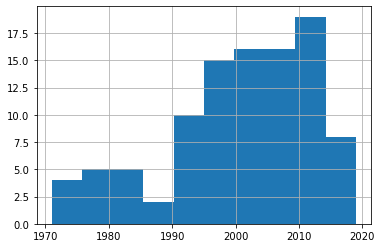

In [99]:
best_films["startYear"].hist()

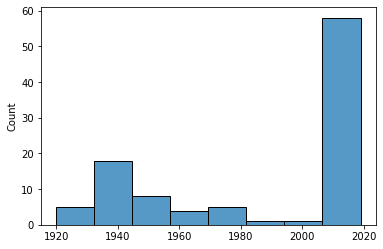

In [102]:
rotto_dates = [int(x.split("(")[-1].split(")")[0]) for x in rotto_scores.keys()]
sns.histplot(rotto_dates)

In [104]:
best_films["metascore_critics"] = -1
best_films["metascore_users"]= -1

In [105]:
with open("meta_scores.json", "r") as f:    
    meta_scores = json.load(f)
meta_scores

{'critics': {'Citizen Kane': 100,
  'The Godfather': 100,
  'Rear Window': 100,
  'Casablanca': 100,
  'Boyhood': 100,
  'Three Colors: Red': 100,
  'Vertigo': 100,
  'Notorious': 100,
  "Singin' in the Rain": 99,
  'City Lights': 99,
  'Moonlight': 99,
  'Intolerance': 99,
  'Pinocchio': 99,
  'Touch of Evil': 99,
  'The Treasure of the Sierra Madre': 98,
  "Pan's Labyrinth": 98,
  'Some Like It Hot': 98,
  'North by Northwest': 98,
  'Rashomon': 98,
  'All About Eve': 98,
  'Hoop Dreams': 98,
  'Jules and Jim': 97,
  'The Wild Bunch': 97,
  'My Left Foot': 97,
  'The Third Man': 97,
  'Nomadland': 97,
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb': 97,
  'Gone with the Wind': 97,
  '4 Months, 3 Weeks and 2 Days': 97,
  'Psycho': 97,
  'Battleship Potemkin': 97,
  'A Streetcar Named Desire': 97,
  'American Graffiti': 97,
  'Dumbo': 96,
  'Roma': 96,
  'Ran': 96,
  'The Shop Around the Corner': 96,
  '12 Angry Men': 96,
  'Manchester by the Sea': 96,
  "Rosem

In [106]:
for i, row in best_films.iterrows():
    for key in meta_scores["critics"].keys():
        if row["primaryTitle"] in key or row["originalTitle"] in key:
            best_films.loc[i,"metascore_critics"] = meta_scores["critics"][key]
            best_films.loc[i,"metascore_users"] = meta_scores["users"][key]
            break


In [107]:
best_films["metascore_critics"].value_counts()

-1      93
 94      4
 100     1
 96      1
 95      1
Name: metascore_critics, dtype: int64

In [108]:
best_films["metascore_users"].value_counts()


-1.0     93
 90.0     2
 78.0     1
 75.0     1
 91.0     1
 88.0     1
 92.0     1
Name: metascore_users, dtype: int64

In [109]:
best_films

,index,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Action,Game-Show,Romance,...,Crime,Mystery,War,Film-Noir,Sci-Fi,averageRating,numVotes,rotten_tomatoes,metascore_critics,metascore_users
25,108756,tt0111161,The Shawshank Redemption,The Shawshank Redemption,1994,142,[Drama],False,False,False,...,False,False,False,False,False,9.3,2302420,-1,-1,-1.0
1,67293,tt0068646,The Godfather,The Godfather,1972,175,"[Crime, Drama]",False,False,False,...,True,False,False,False,False,9.2,1589095,98,100,92.0
67,450691,tt0468569,The Dark Knight,The Dark Knight,2008,152,"[Action, Crime, Drama]",True,False,False,...,True,False,False,False,False,9.0,2266082,94,-1,-1.0
2,70116,tt0071562,The Godfather: Part II,The Godfather: Part II,1974,202,"[Crime, Drama]",False,False,False,...,True,False,False,False,False,9.0,1110301,-1,-1,-1.0
20,105705,tt0108052,Schindler's List,Schindler's List,1993,195,"[Biography, Drama, History]",False,False,False,...,False,False,False,False,False,8.9,1194788,-1,94,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,399907,tt0416449,300,300,2006,117,"[Action, Drama]",True,False,False,...,False,False,False,False,False,7.6,726120,-1,-1,-1.0
96,3909717,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141,"[Action, Adventure, Sci-Fi]",True,False,False,...,False,False,False,False,True,7.3,729347,-1,-1,-1.0
87,2966281,tt1392170,The Hunger Games,The Hunger Games,2012,142,"[Action, Adventure, Sci-Fi]",True,False,False,...,False,False,False,False,True,7.2,836236,-1,-1,-1.0
84,2688112,tt1300854,Iron Man 3,Iron Man Three,2013,130,"[Action, Adventure, Sci-Fi]",True,False,False,...,False,False,False,False,True,7.2,745285,-1,-1,-1.0


### Como solo quiero las películas (largometrajes), elimino todo lo que sean cortos o similares

In [7]:
df["titleType"].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [8]:
df = df.drop(df[df["titleType"]!= "movie"].index)

In [9]:
df.shape

(558057, 9)

In [10]:
df.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [11]:
df[df["startYear"] == "\\N"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
70393,tt0071844,movie,Till Marriage Do Us Part,"Mio Dio, come sono caduta in basso!",0,\N,\N,110,Comedy
109178,tt0111597,movie,The Veiled Hope,The Veiled Hope,0,\N,\N,52,Documentary
115876,tt0118530,movie,18,18,0,\N,\N,\N,Romance
118070,tt0120892,movie,Winding Stair,Winding Stair,0,\N,\N,\N,Thriller
118208,tt0121062,movie,Alexandru Lapusneanu,Alexandru Lapusneanu,0,\N,\N,\N,History
...,...,...,...,...,...,...,...,...,...
7316596,tt9916178,movie,Yesterday's Dreams,Yesterday's Dreams,0,\N,\N,\N,\N
7316600,tt9916188,movie,Minotaur,Minotaur,0,\N,\N,\N,Thriller
7316601,tt9916190,movie,Safeguard,Safeguard,0,\N,\N,90,"Action,Adventure,Thriller"
7316640,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,\N,\N,84,Thriller


In [12]:
df = df.drop(df[df["startYear"]== "\\N"].index)

In [13]:
df.shape

(491349, 9)

In [14]:
df.startYear = df.startYear.astype(int)

In [15]:
df = df.drop(columns=["endYear", "titleType", "tconst"])

In [16]:
df.shape

(491349, 6)

In [17]:
sum(df["runtimeMinutes"] != "\\N")

346660

In [18]:
df = df.drop(df[df["runtimeMinutes"]== "\\N"].index)

In [19]:
df.shape

(346660, 6)

In [20]:
df.head()

,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,Miss Jerry,Miss Jerry,0,1894,45,Romance
498,Bohemios,Bohemios,0,1905,100,\N
570,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama"
672,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
1172,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"


### Limpiamos también las que no tienen un género definido

In [21]:
df = df.drop(df[df["genres"]== "\\N"].index)

In [22]:
df.shape

(323669, 6)

In [23]:
df.head()

,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,Miss Jerry,Miss Jerry,0,1894,45,Romance
570,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Biography,Crime,Drama"
672,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
1172,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
1246,The White Slave Trade,Den hvide slavehandel,0,1910,45,Drama


In [25]:
sum(df["isAdult"] == False)

318158

### Comprobamos los tipos de géneros que tiene el dataset

In [30]:
# Hay 1348 géneros distintos
df["genres"].nunique()

1348

In [37]:
# Esto incluye listas de géneros
df.loc[570].genres

'Biography,Crime,Drama'

In [39]:
df["genres"] = df["genres"].str.split(",")

In [41]:
all_genres = set(itertools.chain.from_iterable(df["genres"]))

In [ ]:
for genre in all_genres:
    df[genre] = df.genres.apply(lambda x : 1 if genre in x else 0)

In [35]:
[x  for x in df["genres"] if "drama" in x.lower().split() ]

['Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
